In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt

Plotear la funcion original

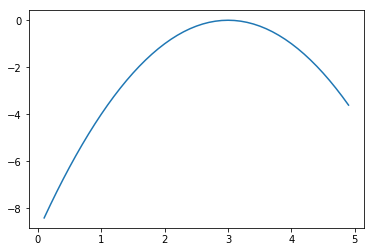

In [2]:
x=np.arange(0.1,5,.1)
x=x.reshape(-1,1)
y=-(x-3)**2
y=y.reshape(-1,1)
plt.plot(x,y)

Declarar la estrucura de la red Neuronal

In [8]:
layer1=200
n_samples=len(x)
batchsize=16

xp=tf.placeholder(tf.float32, [None, 1])
y_exp=tf.placeholder(tf.float32, [None, 1])
W1=tf.Variable(tf.random_normal([1,layer1]))
b1=tf.Variable(tf.zeros([layer1]))

W2=tf.Variable(tf.random_normal([layer1,1]))
b2=tf.Variable(tf.zeros([1]))

x2=tf.nn.sigmoid(tf.add(tf.matmul(xp,W1),b1))
#x2=tf.nn.relu(tf.add(tf.matmul(xp,W1),b1))
#x2=tf.nn.sigmoid(tf.add(tf.matmul(xp,W1),b1))
y_pred=tf.add(tf.matmul(x2,W2),b2)
mse=tf.reduce_sum((y_pred-y_exp+1)**2/batchsize)
#mse=(y_pred-y_exp)**2

Iniciar session de tensorflow y entrenar la red 6000 veces

In [9]:
sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

C:\Users\Legion\Anaconda3\envs\Patt\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [10]:
train_step=tf.train.GradientDescentOptimizer(0.001).minimize(mse)
errorgraph=[]
for step in range(10000):
    if step%1000==0:
        print (step)
        indices = np.random.choice(n_samples, batchsize)
        print(sess.run(mse,feed_dict={xp:x,y_exp:y}))
    if step%100==0:
        errorgraph.append(sess.run(mse,feed_dict={xp:x,y_exp:y}))
    indices = np.random.choice(len(x), batchsize)
    batch_xs, batch_ys =x[indices],y[indices]
    sess.run(train_step, feed_dict={xp:batch_xs,y_exp:batch_ys})
    


0
429.8743
1000
1.878984
2000
0.7084071
3000
0.5247846
4000
0.45004994
5000
0.42940307
6000
0.37665114
7000
0.34353742
8000
0.31892037
9000
0.29771614


Comparar funcion original(naranja) contra aproximacion con NN(Azul)

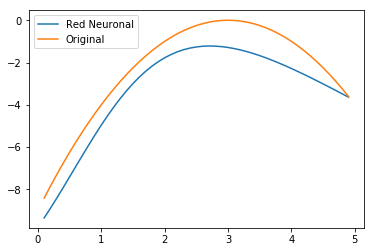

In [11]:
ind=x
inpu = ind.reshape(-1,1)
preded_y=sess.run(y_pred,{xp:inpu})
        
fig=plt.figure()
plt.plot(x,preded_y,label='Red Neuronal')
plt.plot(x,y,label='Original')
plt.legend()
fig.show()

Ploteo de error a lo largo del entrenamineto

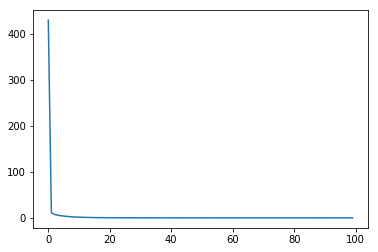

In [12]:
plt.plot(errorgraph)

In [13]:
sess.close()